In [1]:
#install

!pip install pandas-datareader


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [110]:
!pip install yfinance --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import yfinance as yf


# Download TSLA data from Yahoo Finance
tsl = yf.download('TSLA', start='2024-01-01',end='2025-05-12' )

# Show first few rows
tsl.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [83]:
tsl

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600
...,...,...,...,...,...
2025-05-05,280.260010,284.850006,274.399994,284.570007,94618900
2025-05-06,275.350006,277.730011,271.350006,273.109985,76715800


In [84]:
type(tsl)

pandas.core.frame.DataFrame

In [85]:
tsl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2024-01-02 to 2025-05-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   340 non-null    float64
 1   (High, TSLA)    340 non-null    float64
 2   (Low, TSLA)     340 non-null    float64
 3   (Open, TSLA)    340 non-null    float64
 4   (Volume, TSLA)  340 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.9 KB


In [86]:
tsl.isnull().sum()



Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

<AxesSubplot:xlabel='Date'>

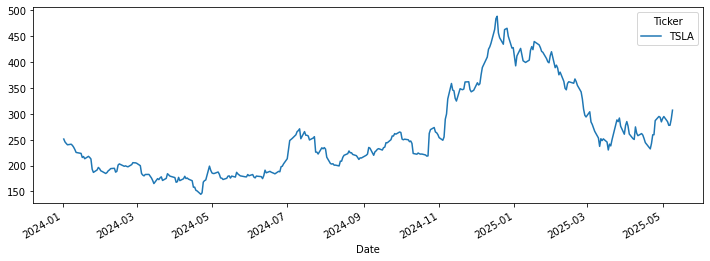

In [87]:
tsl['High'].plot(figsize=(12,4))

In [6]:
index=tsl.loc['2024-01-01':'2024-10-01'].index
share_open=tsl.loc['2024-01-01':'2024-10-01']['Open']

In [89]:
tsl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2024-01-02 to 2025-05-09
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   340 non-null    float64
 1   (High, TSLA)    340 non-null    float64
 2   (Low, TSLA)     340 non-null    float64
 3   (Open, TSLA)    340 non-null    float64
 4   (Volume, TSLA)  340 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 24.0 KB


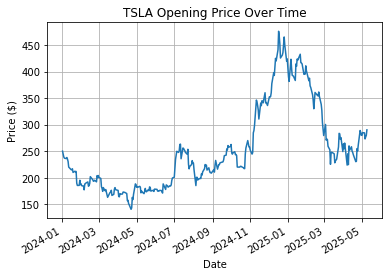

In [90]:
import matplotlib.pyplot as plt

# Method 1: Access using tuple notation for MultiIndex
figure, axis = plt.subplots()
figure.autofmt_xdate()  # For date formatting
axis.plot(tsl.index, tsl[('Open', 'TSLA')])  # Use tuple to access multi-level column

# Method 2: Another option is to use .loc
# axis.plot(tsl.index, tsl.loc[:, ('Open', 'TSLA')])

plt.title('TSLA Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [91]:
tsl.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [92]:
datetime.now()

datetime.datetime(2025, 5, 14, 10, 18, 17, 651627)

In [93]:
#time resampling

<AxesSubplot:xlabel='Date'>

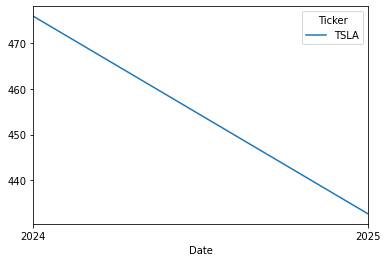

In [7]:

tsl.resample(rule='A').max()['Open'].plot()

In [4]:
tsl.resample(rule='A').max()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-12-31,293.339996,299.290009,289.519989,296.040009,306590600
2024-12-31,479.859985,488.540009,457.510010,475.899994,243869700
2025-12-31,428.220001,439.739990,419.750000,432.640015,219433400


<AxesSubplot:xlabel='Date'>

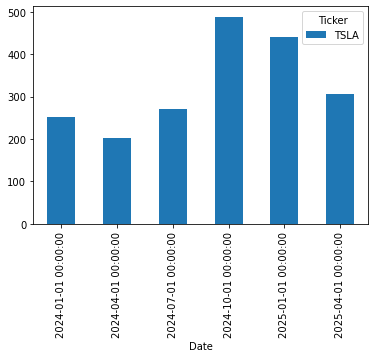

In [96]:
tsl.resample(rule='QS').max()['High'].plot(kind='bar')

In [97]:
tsl['High'].rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [98]:
tsl['High'].rolling(10).mean()

Ticker,TSLA
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,NaN
...,...
2025-05-05,279.176003
2025-05-06,282.670004
2025-05-07,284.517004


In [99]:
tsl['High'].rolling(10).mean().head(20)

Ticker,TSLA
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,NaN
2024-01-09,NaN
2024-01-10,NaN
2024-01-11,NaN
2024-01-12,NaN


In [100]:
#if we give 11 the 16-01 also becomes nan
tsl['High'].rolling(11).mean().head(20)


Ticker,TSLA
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,NaN
2024-01-09,NaN
2024-01-10,NaN
2024-01-11,NaN
2024-01-12,NaN


In [103]:
tsl['Open:30 days']=tsl['Open'].rolling(30).mean()


In [104]:
tsl.head(32)


Price,Close,High,Low,Open,Volume,Open:30 days
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200,NaN
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600,NaN
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300,NaN
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400,NaN
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600,NaN
2024-01-09,234.960007,238.960007,232.039993,238.110001,96705700,NaN
2024-01-10,233.940002,235.500000,231.289993,235.100006,91628500,NaN
2024-01-11,227.220001,230.929993,225.369995,230.570007,105873600,NaN


<AxesSubplot:xlabel='Date'>

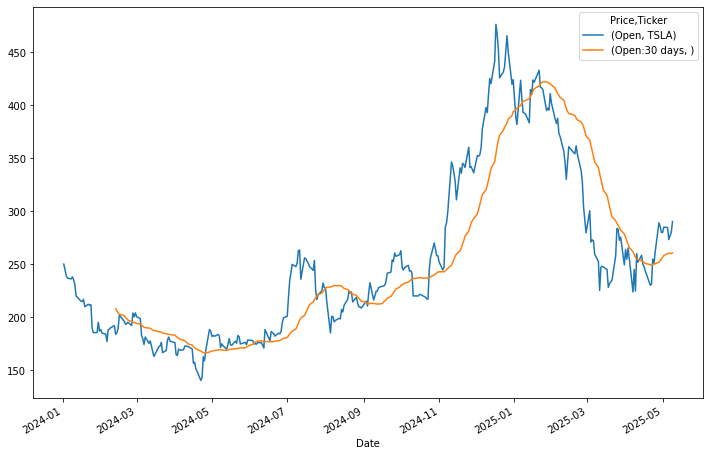

In [105]:
tsl[['Open','Open:30 days']].plot(figsize=(12,8))

In [106]:
# Simple moving average 
#smoothening the curve
"""In rolling there is a parameter called min_periods which helps us to keep the values and avoid nan values to an 
extend like min_period=2 means first 2 values will be nan and remaiang same rolling mean value fill be filled
"""

'In rolling there is a parameter called min_periods which helps us to keep the values and avoid nan values to an \nextend like min_period=2 means first 2 values will be nan and remaiang same rolling mean value fill be filled\n'

In [107]:
tsl.head(25)

Price,Close,High,Low,Open,Volume,Open:30 days
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200,NaN
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600,NaN
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300,NaN
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400,NaN
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600,NaN
2024-01-09,234.960007,238.960007,232.039993,238.110001,96705700,NaN
2024-01-10,233.940002,235.500000,231.289993,235.100006,91628500,NaN
2024-01-11,227.220001,230.929993,225.369995,230.570007,105873600,NaN


<AxesSubplot:xlabel='Date'>

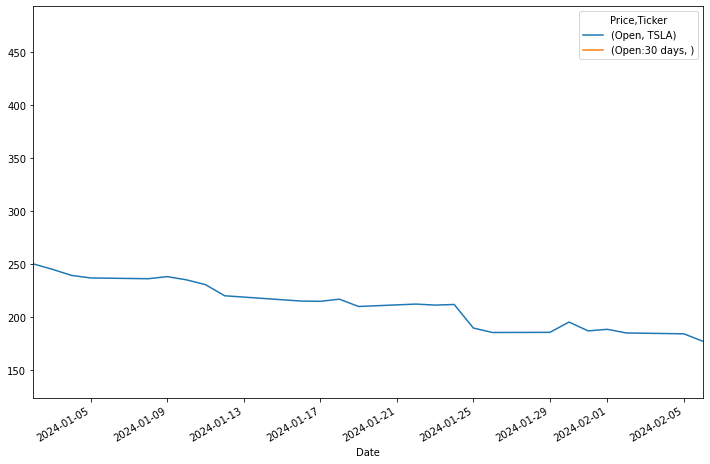

In [108]:
tsl[['Open','Open:30 days']].plot(xlim=['2024-01-02','2024-02-06'],figsize=(12,8))

In [109]:
tsl['Open:10 days']=tsl['Open'].rolling(10).mean()
tsl['Open:20 days']=tsl['Open'].rolling(20).mean()

In [110]:
tsl.head(40)

Price,Close,High,Low,Open,Volume,Open:30 days,Open:10 days,Open:20 days
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200,NaN,NaN,NaN
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600,NaN,NaN,NaN
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300,NaN,NaN,NaN
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400,NaN,NaN,NaN
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600,NaN,NaN,NaN
2024-01-09,234.960007,238.960007,232.039993,238.110001,96705700,NaN,NaN,NaN
2024-01-10,233.940002,235.500000,231.289993,235.100006,91628500,NaN,NaN,NaN
2024-01-11,227.220001,230.929993,225.369995,230.570007,105873600,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

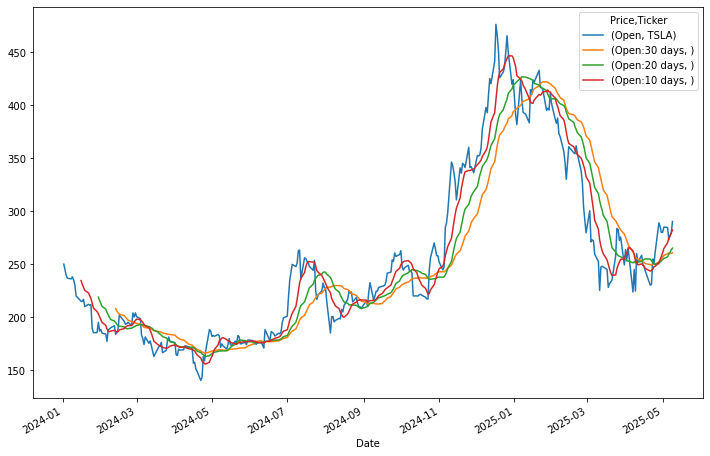

In [112]:
tsl[['Open','Open:30 days','Open:20 days','Open:10 days']].plot(figsize=(12,8))

In [115]:
##Cumulative average
##Expanding
"""
adds up each value and finds mean for 1st is the same 2nd is mean of 1+2 and 3rd mean of 1+2+3 etc
"""

'\nadds up each value and finds mean for 1st is the same 2nd is mean of 1+2 and 3rd mean of 1+2+3 etc\n'

<AxesSubplot:xlabel='Date'>

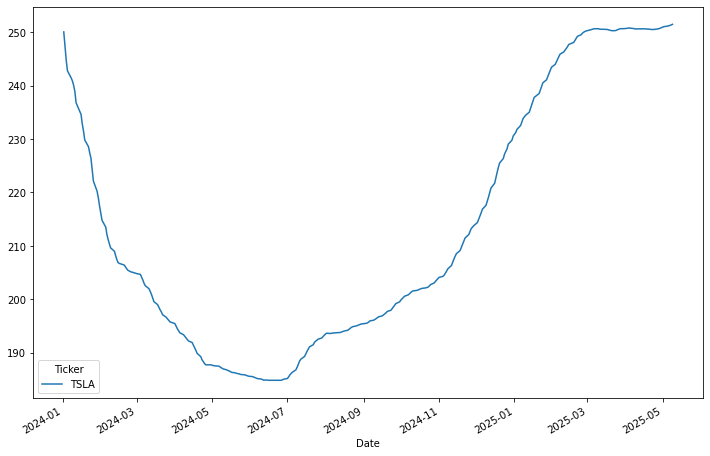

In [114]:
tsl['Open'].expanding().mean().plot(figsize=(12,8))

In [116]:
##exponential moving average (EMA)-----'EWMA'
##smoothening factor = 0.1

In [118]:
tsl['EMA-0.1']=tsl['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

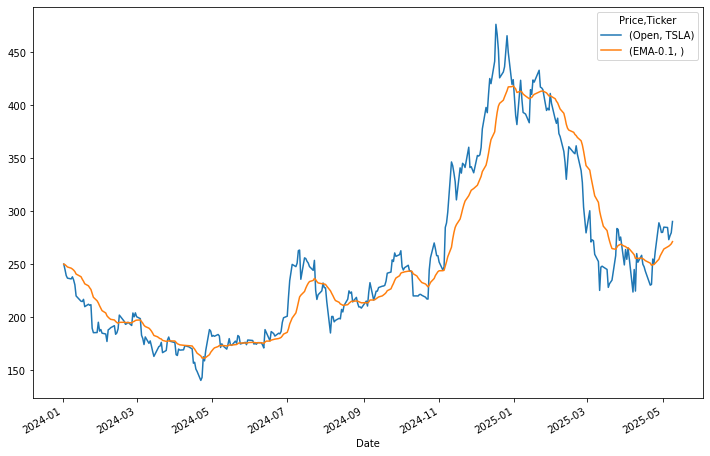

In [119]:
tsl[['Open','EMA-0.1']].plot(figsize=(12,8))

In [120]:
tsl['EMA-0.4']=tsl['Open'].ewm(alpha=0.4,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

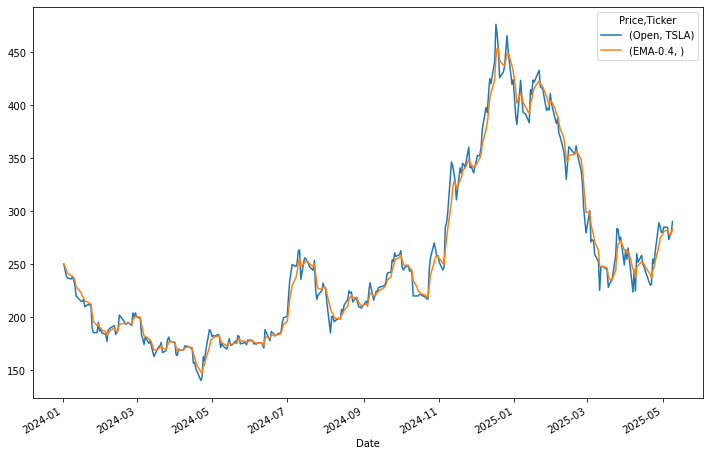

In [121]:
tsl[['Open','EMA-0.4']].plot(figsize=(12,8))